In [1]:
# Import the dependencies
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# Store the CSV into a DataFrame
merged_covid_df = pd.read_csv("../Resources/merged_covid.csv")
# merged_covid_df

### Trying to create a charts that shows shows historicals for index, cases, deaths, and tests

In [3]:
# Create new Dataframe filtered for Canada
canada_df = pd.DataFrame(merged_covid_df.loc[merged_covid_df["location"]=="Canada"].reset_index())
canada_df = canada_df.drop(["index"],axis=1)
# canada_df

In [4]:
# Create new Dataframe filtered for USA
usa_df = pd.DataFrame(merged_covid_df.loc[merged_covid_df["location"]=="United States"].reset_index())
usa_df = usa_df.drop(["index"],axis=1)
# usa_df

In [5]:
# Set the x-axis to a date_updated and y-axis to StringencyIndex_updated for Canada
x_axis = canada_df["date_updated"]
y_axis = canada_df["StringencyIndex_updated"]

# Set the x-axis to a date_updated and y-axis to StringencyIndex_updated for USA
x_axis0 = usa_df["date_updated"]
y_axis0 = usa_df["StringencyIndex_updated"]

Text(0.5, 1.0, 'Stringency Index by Day - CANADA')

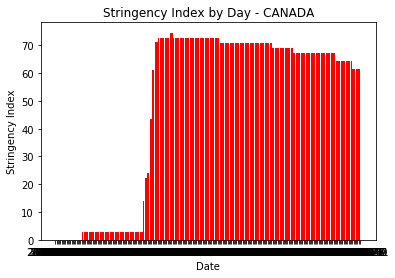

In [6]:
# Create the plot - canada
plt.bar(x_axis, y_axis, color="red", label="Stringency Index")

# Create labels for the x and y axis
plt.xlabel("Date")
plt.ylabel("Stringency Index")

# Create a title
plt.title("Stringency Index by Day - CANADA")

Text(0.5, 1.0, 'Stringency Index by Day - USA')

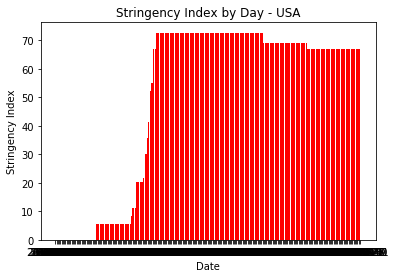

In [7]:
# Create the plot - usa
plt.bar(x_axis0, y_axis0, color="red", label="Stringency Index")

# Create labels for the x and y axis
plt.xlabel("Date")
plt.ylabel("Stringency Index")

# Create a title
plt.title("Stringency Index by Day - USA")

In [8]:
# Set the x-axis to a date_updated and y-axis to totals for Canada
x_axis1 = canada_df["date_updated"]
y_axis1 = canada_df["total_cases_updated"]
x_axis2 = canada_df["date_updated"]
y_axis2 = canada_df["total_tests_updated"]
x_axis3 = canada_df["date_updated"]
y_axis3 = canada_df["total_deaths_updated"]
x_axis4 = canada_df["date_updated"]
y_axis4 = canada_df["new_cases"]
x_axis5 = canada_df["date_updated"]
y_axis5 = canada_df["new_tests"]
x_axis6 = canada_df["date_updated"]
y_axis6 = canada_df["new_deaths"]

In [9]:
# Set the x-axis to a date_updated and y-axis to totals for USA
x_axis01 = usa_df["date_updated"]
y_axis01 = usa_df["total_cases_updated"]
x_axis02 = usa_df["date_updated"]
y_axis02 = usa_df["total_tests_updated"]
x_axis03 = usa_df["date_updated"]
y_axis03 = usa_df["total_deaths_updated"]
x_axis04 = usa_df["date_updated"]
y_axis04 = usa_df["new_cases"]
x_axis05 = usa_df["date_updated"]
y_axis05 = usa_df["new_tests"]
x_axis06 = usa_df["date_updated"]
y_axis06 = usa_df["new_deaths"]

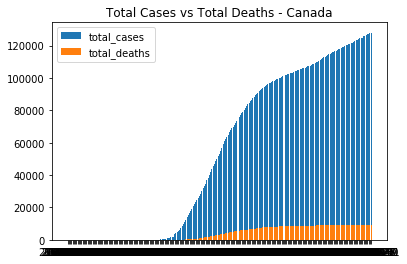

In [10]:
# Create the stacked bar chart - Canada
p1 = plt.bar(x_axis1 , y_axis1)
p2 = plt.bar(x_axis3, y_axis3)

plt.title("Total Cases vs Total Deaths - Canada")

plt.legend(["total_cases", "total_deaths"])

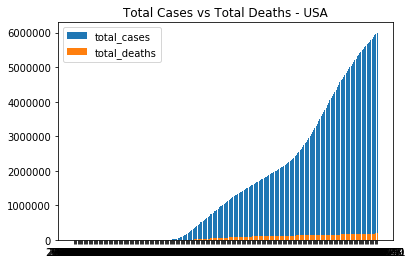

In [11]:
# Create the stacked bar chart - USA
p01 = plt.bar(x_axis01 , y_axis01)
p02 = plt.bar(x_axis03, y_axis03)

plt.title("Total Cases vs Total Deaths - USA")

plt.legend(["total_cases", "total_deaths"])

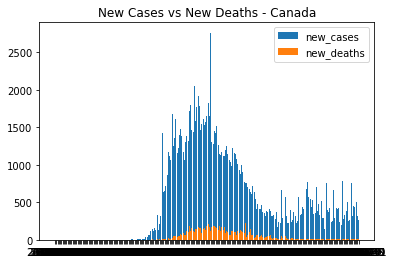

In [12]:
# Plot daily amounts for cases, deaths - Canada
p4 = plt.bar(x_axis4 , y_axis4)
p5 = plt.bar(x_axis6 , y_axis6)

plt.title("New Cases vs New Deaths - Canada")

plt.legend(["new_cases", "new_deaths"])

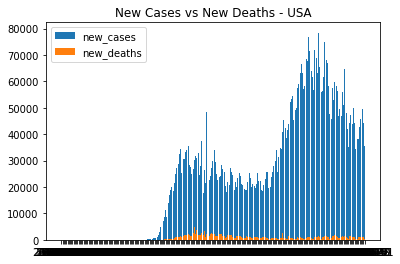

In [13]:
# Plot daily amounts for cases, deaths - Usa
p04 = plt.bar(x_axis04 , y_axis04)
p05 = plt.bar(x_axis06 , y_axis06)

plt.title("New Cases vs New Deaths - USA")

plt.legend(["new_cases", "new_deaths"])

### Trying to add a new column that calculates percentage change with strigency index

In [14]:
# Create new Dataframe filtered for Canada
new_canada_df = pd.DataFrame(merged_covid_df.loc[merged_covid_df["location"]=="Canada"].reset_index())
# new_canada_df

In [15]:
# Create new Dataframe filtered for USA
new_usa_df = pd.DataFrame(merged_covid_df.loc[merged_covid_df["location"]=="United States"].reset_index())
# new_usa_df

In [16]:
# Create new column - percentage change for stringency index - Canada
new_canada_df["percentage_change_stringency"] = new_canada_df["StringencyIndex_updated"].pct_change()*100
new_canada_df = new_canada_df.drop(["index"],axis=1)
new_canada_df['percentage_change_stringency'].fillna(0, inplace=True)
# new_canada_df

In [17]:
# Create new column - percentage change for stringency index - USA
new_usa_df["percentage_change_stringency"] = new_usa_df["StringencyIndex_updated"].pct_change()*100
new_usa_df = new_usa_df.drop(["index"],axis=1)
new_usa_df['percentage_change_stringency'].fillna(0, inplace=True)
# new_usa_df

In [18]:
# Set the x-axis to a date_updated and y-axis to percentage change for Canada
x_axis = new_canada_df["date_updated"]
y_axis = new_canada_df["percentage_change_stringency"]

In [19]:
# Set the x-axis to a date_updated and y-axis to percentage change for Canada
x_axis0 = new_usa_df["date_updated"]
y_axis0 = new_usa_df["percentage_change_stringency"]

Text(0.5, 1.0, 'Stringency Index Percentage Change - Canada')

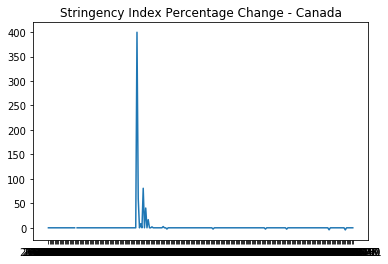

In [20]:
# Plot daily percentage change for stringency index - CANADA
plt.plot(x_axis , y_axis)

plt.title("Stringency Index Percentage Change - Canada")

Text(0.5, 1.0, 'Stringency Index Percentage Change - USA')

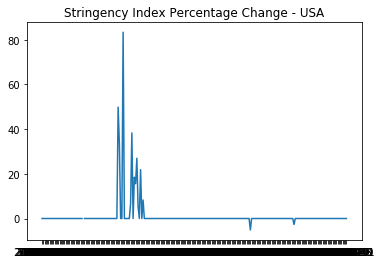

In [21]:
# Plot daily percentage change for stringency index - USA
plt.plot(x_axis0 , y_axis0)

plt.title("Stringency Index Percentage Change - USA")

### Will filter for the days that have material changes in policy

In [22]:
# Filter based on percentage changes greater than 10% or any decrease in policy
new_usa_GT10 = new_usa_df.loc[(new_usa_df.percentage_change_stringency > 10) | (new_usa_df.percentage_change_stringency < 0)]
new_usa_GT10


,date_updated,iso_code,continent,location,new_cases,new_deaths,new_tests,total_cases_updated,total_deaths_updated,total_tests_updated,StringencyIndex_updated,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,ContainmentHealthIndex_updated,EconomicSupportIndex_updated,percentage_change_stringency
33,2020-02-02,USA,North America,United States,1.0,0.0,0.0,8.0,0.0,0.0,5.56,7.14,7.69,9.09,0.0,inf
61,2020-03-01,USA,North America,United States,3.0,1.0,132.0,69.0,1.0,132.0,8.33,11.90,12.18,14.39,0.0,49.820144
62,2020-03-02,USA,North America,United States,20.0,1.0,345.0,89.0,2.0,477.0,11.11,15.48,14.10,16.67,0.0,33.373349
65,2020-03-05,USA,North America,United States,34.0,2.0,1119.0,159.0,11.0,3217.0,20.37,26.19,23.08,27.27,0.0,83.348335
72,2020-03-12,USA,North America,United States,287.0,2.0,6786.0,1312.0,30.0,22801.0,30.09,30.95,29.81,35.23,0.0,38.281250
74,2020-03-14,USA,North America,United States,511.0,7.0,10305.0,2174.0,47.0,42751.0,35.65,40.48,36.22,42.80,0.0,18.477900
75,2020-03-15,USA,North America,United States,777.0,10.0,11777.0,2951.0,57.0,54528.0,41.20,40.48,40.06,47.35,0.0,15.568022
76,2020-03-16,USA,North America,United States,823.0,12.0,22441.0,3774.0,69.0,76969.0,52.31,54.76,47.76,56.44,0.0,26.966019
79,2020-03-19,USA,North America,United States,2988.0,42.0,55633.0,9415.0,150.0,213433.0,67.13,70.24,58.01,68.56,0.0,21.855146
167,2020-06-15,USA,North America,United States,19543.0,296.0,558795.0,2094069.0,115732.0,26309869.0,68.98,68.57,68.91,70.08,62.5,-5.103866
